## Figure 3 Code to Produce Figures

This figure will focus on the presentation of Assembly Extraction Results.

In [1]:
# importing packages
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import pandas as pd
import csv
import math
import random
import pickle
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import squareform, pdist
import scipy.io
from scipy import stats
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import statsmodels.api as sm
from sklearn import manifold
import upsetplot
import seaborn as sns
# plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (10,10)
# sns.set_theme(style="whitegrid")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### With Parameter Tuned SGC, we now Continue with Analysis
- Do more visualization, update the coloring

In [2]:
esteps_150000_affinity_04_V1DD_session13_SGC_ASSEMBLIES = scipy.io.loadmat("../Data/Session13/Assembly_Files/esteps_150000_affinity_04_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)
### Load in locations
V1DD_session13_cell_locations = np.load("../Data/Session13/sessionM409828_13_locations.npy")

In [3]:
for i, assembly in enumerate(esteps_150000_affinity_04_V1DD_session13_SGC_ASSEMBLIES["assemblies"]):
    print(f'A {i+1} has {len(assembly)} Neurons')

A 1 has 328 Neurons
A 2 has 48 Neurons
A 3 has 114 Neurons
A 4 has 35 Neurons
A 5 has 61 Neurons
A 6 has 121 Neurons
A 7 has 23 Neurons
A 8 has 1016 Neurons
A 9 has 542 Neurons
A 10 has 188 Neurons
A 11 has 112 Neurons
A 12 has 325 Neurons
A 13 has 187 Neurons
A 14 has 230 Neurons
A 15 has 181 Neurons


In [4]:
###################### Load in Calcium Fluoresence Data ######################
session13_fluorescence = np.load("../Data/Session13/sessionM409828_13_CALCIUM-FLUORESCENCE.npy")
session_info = "V1DD_Session13"

### Create Pandas data frame of the data
ns = [f"n{i}" for i in range(session13_fluorescence[0,:].shape[0])]
session13_fluorescence_df = pd.DataFrame(session13_fluorescence, columns = ns)
session13_fluorescence_df

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n2698,n2699,n2700,n2701,n2702,n2703,n2704,n2705,n2706,n2707
0,386.614746,356.042969,364.569641,411.091553,307.887634,258.511169,321.968903,181.205994,265.892914,280.296112,...,274.629486,350.200104,283.980774,345.541870,244.838470,274.587616,292.187408,362.794220,309.516724,318.196716
1,394.779144,321.291138,300.326233,364.549255,365.808014,276.043915,443.065826,276.137421,284.962494,311.085419,...,237.430527,300.656067,371.085419,369.188751,297.386108,266.207123,252.236877,384.805908,253.801224,309.436493
2,430.134644,356.892334,316.089752,369.321747,357.231720,268.536591,380.504395,237.075073,292.391113,303.730865,...,234.579224,233.114975,375.837341,309.508606,319.197876,264.221771,299.052185,421.659119,268.491364,308.236237
3,492.495636,435.140076,328.820099,450.870300,322.758728,283.486267,456.826660,240.693878,298.278900,312.732330,...,312.513519,288.417877,375.175171,298.330444,295.929596,281.991943,291.278473,378.071320,384.879822,342.556366
4,419.968262,367.274200,324.190277,457.118439,391.038940,298.655029,425.800476,229.693817,371.756531,293.526672,...,258.952301,349.974335,346.097595,366.578918,297.467255,328.501526,309.428894,408.260315,347.325104,331.188110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21611,312.012756,361.765015,292.936798,479.136536,364.582458,348.525269,432.958282,265.899567,364.285889,276.832275,...,265.440521,327.389404,314.704071,284.906982,287.028564,280.412109,305.130524,442.109039,266.693573,285.021912
21612,412.542938,353.919128,323.288300,348.898071,383.361847,344.100220,437.041687,193.464905,314.954651,297.092010,...,258.959564,406.966003,341.093964,357.600220,352.963226,278.937195,294.812195,447.871368,294.682220,292.638519
21613,372.910217,388.861816,337.440063,453.535980,350.960876,268.740021,372.935608,239.881393,377.214508,268.052277,...,270.972809,270.036163,298.712524,378.840210,286.396790,301.706818,279.817627,359.911774,317.252136,257.778015
21614,328.085480,415.220123,292.897522,428.899628,355.838837,375.188202,457.023590,239.636383,302.490509,297.914673,...,266.925446,329.060760,306.616821,377.095612,253.035202,261.195953,280.266388,365.129639,325.545532,349.931305


In [5]:
with open("../Figure3/ordered_final_assemblies.npy", 'rb') as f:
    ordered_final_assemblies = np.load(f, allow_pickle=True)

for i, assembly in enumerate(ordered_final_assemblies):
    print(f'A {i+1} has {len(assembly)} Neurons')

A 1 has 1016 Neurons
A 2 has 542 Neurons
A 3 has 328 Neurons
A 4 has 325 Neurons
A 5 has 230 Neurons
A 6 has 188 Neurons
A 7 has 187 Neurons
A 8 has 181 Neurons
A 9 has 121 Neurons
A 10 has 114 Neurons
A 11 has 112 Neurons
A 12 has 61 Neurons
A 13 has 48 Neurons
A 14 has 35 Neurons
A 15 has 23 Neurons


### Heatmap of Entire Scan (Downsampled)

In [6]:
session13_fluorescence.shape

(21616, 2708)

In [7]:
dff = np.load("../Data/Session13/sessionM409828_13_dff.npy")
dff.shape

(21616, 2708)

In [8]:
# Suppose dff is a 2D array of shape (n_neurons, n_timepoints)
# e.g., dff.shape -> (2704, 21616)

# 1) Compute your activity metric (here, peak value)
peak_activity = dff.max(axis=1)  # shape: (n_neurons,)

# 2) Sort neurons by that metric
sorted_indices = np.argsort(peak_activity)[::-1]  # descending order

# 3) Pick the top k neurons
k = 20
high_activity_indices = sorted_indices[:k]

(2708, 4324)


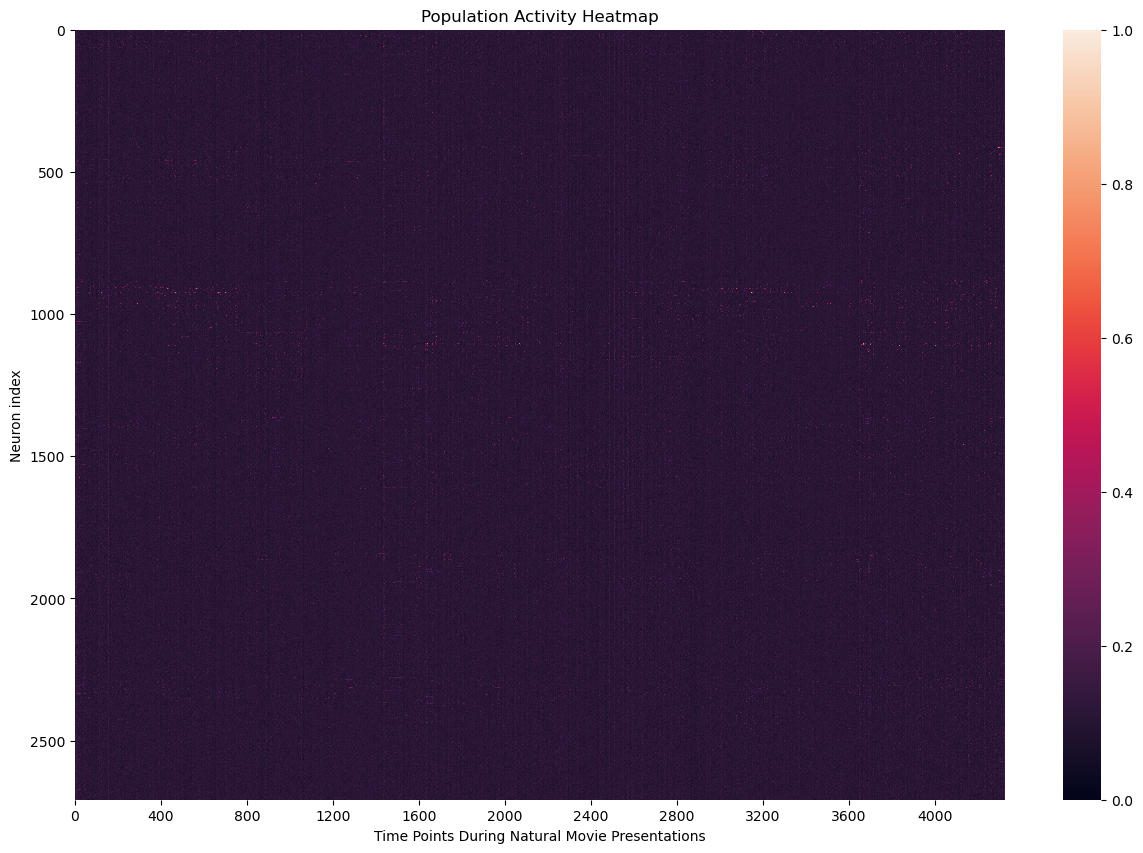

In [9]:
# Downsample time by a factor
downsample_factor = 5
dff_downsampled = dff[::downsample_factor,:].T
print(dff_downsampled.shape)

plt.figure(figsize=(15, 10))
ax = sns.heatmap(dff_downsampled)
# Set color limits on the image inside the Axes object
ax.collections[0].set_clim(0, 1)

plt.xlabel("Time Points During Natural Movie Presentations")
plt.xticks(np.arange(0, dff_downsampled.shape[1], 400), 
           np.arange(0, dff_downsampled.shape[1], 400), rotation = 0)
plt.yticks(np.arange(0, dff_downsampled.shape[0], 500), 
           np.arange(0, dff_downsampled.shape[0], 500))
plt.ylabel("Neuron index")
plt.title("Population Activity Heatmap")
plt.show()

In [10]:
def generate_raster_plot(dff_traces):
    """
    Generate a raster plot of dF/F traces where events are defined as 
    values that exceed two standard deviations above the mean for each neuron.
    
    Parameters
    ----------
    dff_traces : 2D numpy array or pandas DataFrame
        An array or DataFrame containing dF/F traces with shape (n_neurons, n_timepoints).

    The default plot uses a black and white (binary) colormap.
    """
    # Convert DataFrame to numpy array if necessary
    if isinstance(dff_traces, pd.DataFrame):
        data = dff_traces.values
    else:
        data = dff_traces
    
    # Compute the threshold for each neuron: mean + 2 standard deviations
    threshold = np.mean(data, axis=1, keepdims=True) + 2 * np.std(data, axis=1, keepdims=True)
    
    # Create a boolean array marking events (True where data > threshold)
    events = data > threshold

    
    # Create the raster plot using seaborn's heatmap.
    # The 'binary' colormap gives a black and white display.
    plt.figure(figsize=(14, 10))
    ax = sns.heatmap(events, cmap='binary', cbar=False, yticklabels=False, xticklabels=False, linewidths=0)
    
    # Add labels and title
    plt.xlabel("Time (s)", fontsize = 24)
    plt.ylabel("Neurons", fontsize = 24)
    plt.title("Raster Plot of dF/F Events", fontsize = 30)
    plt.savefig(f"raster_plot_binary.png", dpi=300, bbox_inches='tight')
    plt.show()

    # white-to-red gradient:
    #
    from matplotlib.colors import LinearSegmentedColormap
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["white", "darkred"])
    plt.figure(figsize=(14, 10))
    ax = sns.heatmap(events, cmap=custom_cmap, cbar=False, yticklabels=False, xticklabels=False, linewidths=0)
    plt.xlabel("Time (s)", fontsize = 24)
    plt.ylabel("Neurons", fontsize = 24)
    plt.title("Raster Plot of dF/F Events", fontsize = 30)
    plt.savefig(f"raster_plot_red.png", dpi=300, bbox_inches='tight')
    plt.show()

# Example usage:
# Assuming `session13_dff` is your 2D array or DataFrame of dF/F traces:
# generate_raster_plot(session13_dff)


In [11]:
dff[10000:20000,:]

array([[0.12691905, 0.11094776, 0.11133403, ..., 0.08230107, 0.07126976,
        0.07495836],
       [0.10830314, 0.12159996, 0.06029287, ..., 0.11140314, 0.1374659 ,
        0.13202924],
       [0.12459713, 0.12692025, 0.10670585, ..., 0.10326444, 0.10481541,
        0.1068304 ],
       ...,
       [0.09191829, 0.08553661, 0.12173291, ..., 0.11676437, 0.08274965,
        0.10660592],
       [0.10179038, 0.13925193, 0.10404906, ..., 0.12440251, 0.13469471,
        0.1195104 ],
       [0.12340416, 0.14512818, 0.12920386, ..., 0.08546925, 0.10853896,
        0.11535796]], dtype=float32)

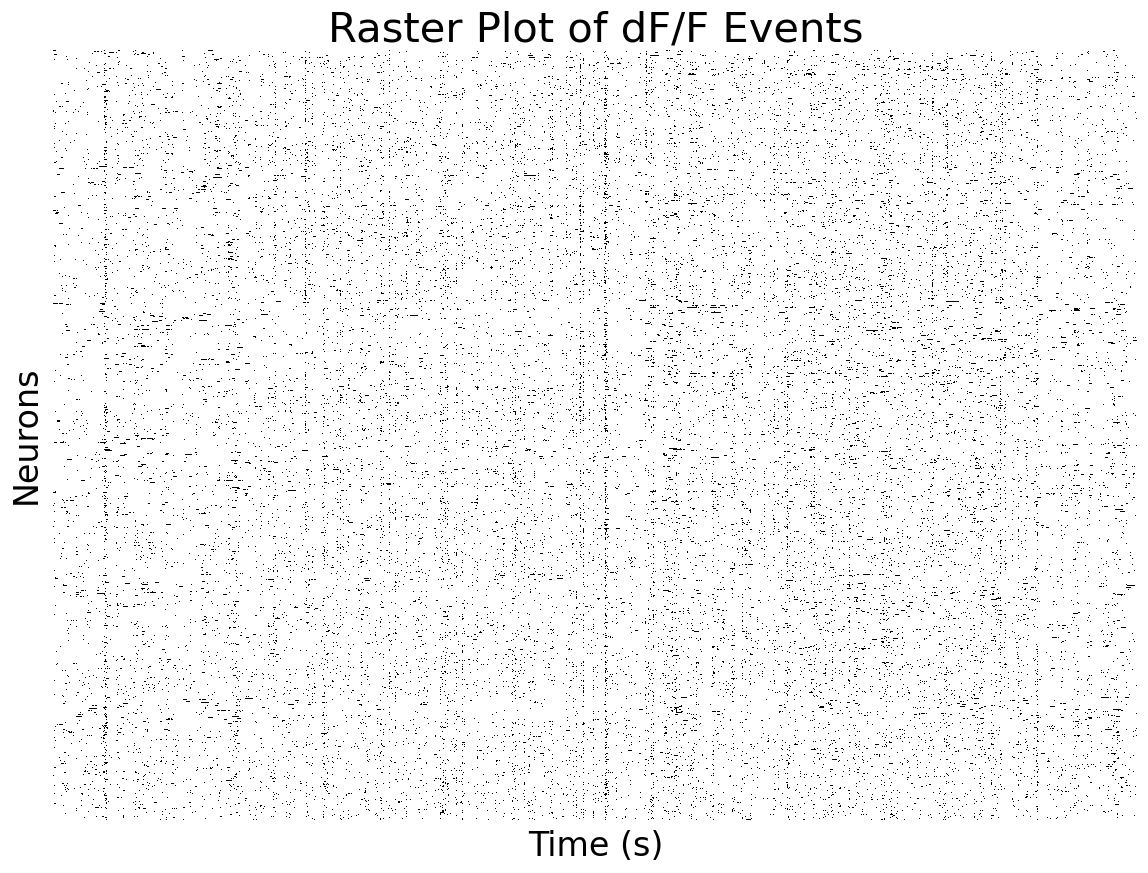

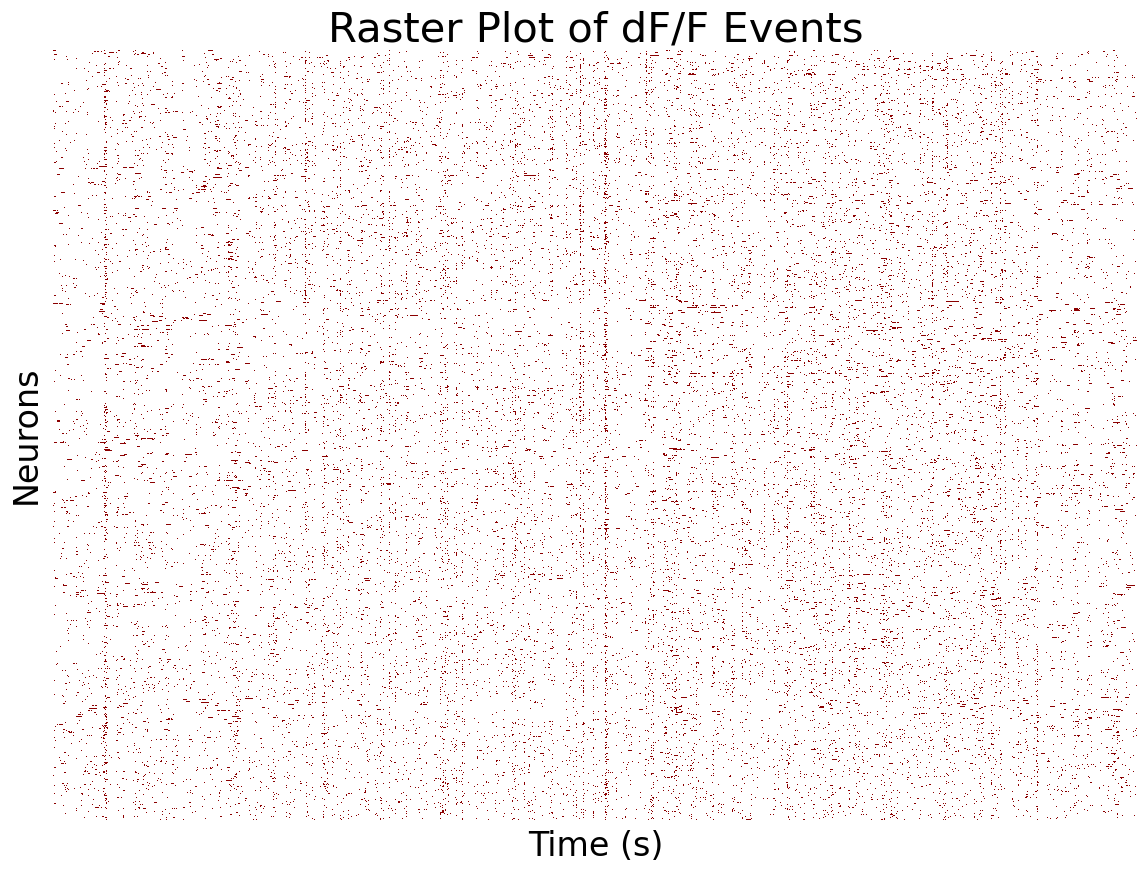

In [12]:
generate_raster_plot(dff[10000:15000,:].T)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


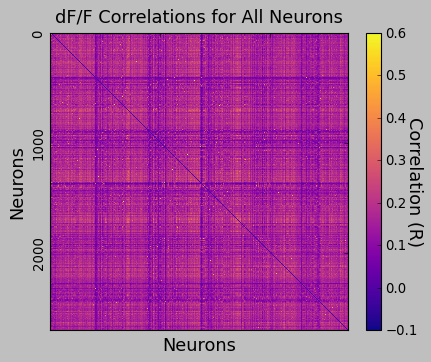

In [13]:
plt.style.use('classic')
# Compute the correlation matrix and set self-correlations to 0
corr_matrix_session13_V1DD = np.corrcoef(session13_fluorescence[sorted_indices], rowvar=False)
np.fill_diagonal(corr_matrix_session13_V1DD, 0)

# Plot the correlation matrix using plt.matshow and store the returned image object
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["grey", "darkblue"])
img = plt.matshow(corr_matrix_session13_V1DD, cmap='plasma')
plt.title('dF/F Correlations for All Neurons', fontsize= 16, y = 1.02)
img.set_clim(-0.1, 0.6)
plt.xlabel("Neurons", fontsize = 16)
plt.xticks(np.arange(0, corr_matrix_session13_V1DD.shape[0], 1000), 
            np.arange(0, corr_matrix_session13_V1DD.shape[0], 1000), fontsize = 12)
plt.yticks(np.arange(0, corr_matrix_session13_V1DD.shape[0], 1000), 
            np.arange(0, corr_matrix_session13_V1DD.shape[0], 1000), fontsize = 12, rotation = 90)
plt.ylabel("Neurons", fontsize = 16)
plt.tick_params(left=False, bottom=False, labelleft=True, labelbottom=False, labeltop=False)

# Pass the mappable image to colorbar and adjust properties
cbar = plt.colorbar(img, shrink=0.8)
cbar.ax.set_ylabel('Correlation (R)', rotation=270, x = 1.2, fontsize= 16)
plt.savefig('Correlation_Matrix.png', dpi = 300, bbox_inches='tight')
plt.show()

# Grab Traces of Peak Activity

In [14]:
session13_fluorescence.shape
dff = session13_fluorescence.T
dff.shape

(2708, 21616)

In [15]:
# Suppose dff is a 2D array of shape (n_neurons, n_timepoints)
# e.g., dff.shape -> (2704, 21616)

# 1) Compute your activity metric (here, peak value)
peak_activity = dff.max(axis=1)  # shape: (n_neurons,)

# 2) Sort neurons by that metric
sorted_indices = np.argsort(peak_activity)[::-1]  # descending order

# 3) Pick the top k neurons
k = 20
high_activity_indices = sorted_indices[:k]

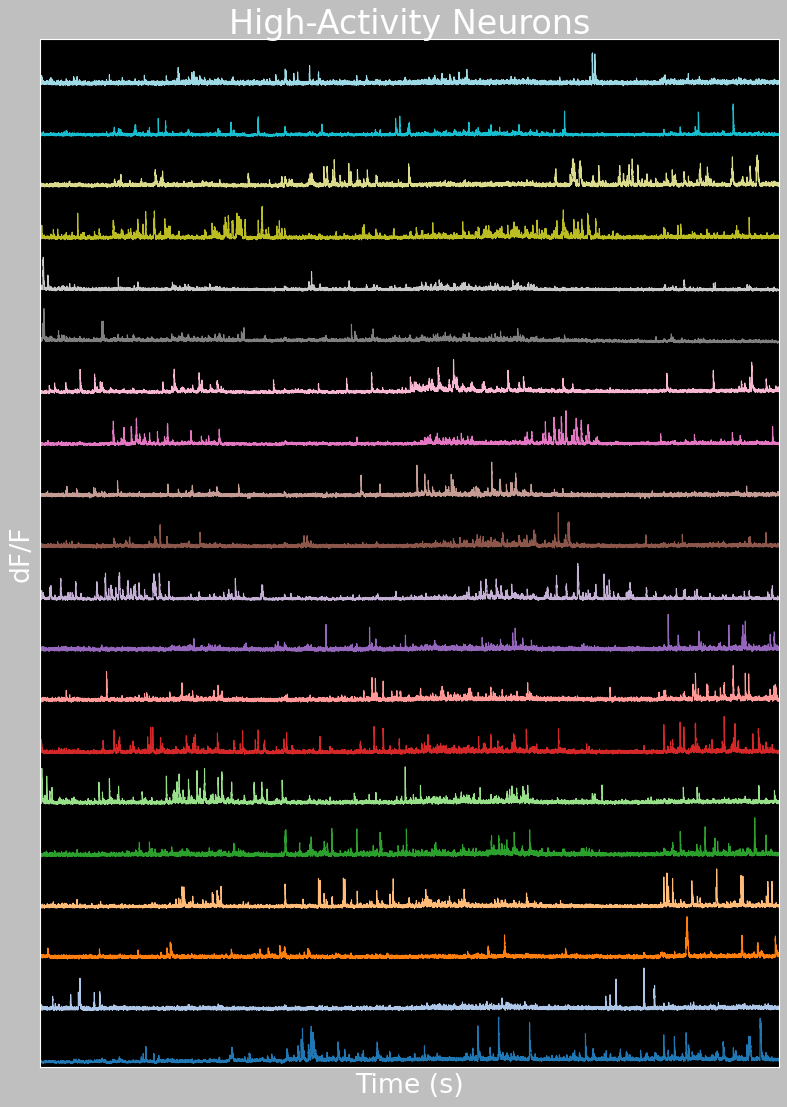

In [16]:
def plot_high_activity_traces(dff_trace, high_activity_indices, offset=2.0):
    """
    Plots the traces of the specified neurons in a stacked format.
    
    Parameters:
    -----------
    dff : np.ndarray
        dF/F data of shape (n_neurons, n_timepoints)
    high_activity_indices : list or np.ndarray
        Indices of neurons to plot
    offset : float
        Vertical offset to apply between traces
    """
    n_timepoints = dff_trace.shape[1]
    time = np.arange(n_timepoints)

    # Optional: pick a colormap or color cycle
    cmap = plt.cm.get_cmap("tab20", len(high_activity_indices))

    plt.figure(figsize=(10, 14))
    
    # # Loop over the high-activity neurons
    # for i, neuron_idx in enumerate(high_activity_indices):
    #     # Shift the trace upward by i*offset
    #     trace = dff_trace[neuron_idx, :] + i * offset
    #     color = cmap(i)  # pick a distinct color

    #     plt.plot(time, trace, color=color, label=f"Neuron {neuron_idx}")
    
    plt.style.use("dark_background")  # Switch to a dark background style

    for i, neuron_idx in enumerate(high_activity_indices):
        trace = dff_trace[neuron_idx, :] + i * offset
        color = cmap(i)
        plt.plot(time, trace, color=color)
        # Optional fill:
        # plt.fill_between(time, i*offset, trace, color=color, alpha=0.1)

    # Make it look nice
    plt.xlabel("Time (s)", fontsize = 24)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel("dF/F", fontsize = 24)
    plt.title("High-Activity Neurons", fontsize = 30)
    plt.savefig("High_Activity_Traces.png", dpi=300, bbox_inches='tight')
    plt.tick_params(left=False, bottom=False)
    plt.tight_layout()
    plt.show()


# Call the function on your data
plot_high_activity_traces(dff, high_activity_indices, offset=3000.0)
